# Project #6 Exploratory Data Analysis.
## by Charlie Todd
## 06/04/2024
This notebook will preform exploratory data analysis of the [mpg data set](https://github.com/charlietodd11/datafun-06-eda/blob/main/data/mpg.csv) which describes the fuel efficency of various cars. 

In [83]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load the data into pandas DataFrame.

In [84]:
df = sns.load_dataset('mpg')

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


## Initial Data Inspection

In [85]:
print(df.head(10))
print('')
print(df.shape)
print('')
print(df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa         

## Initial Descriptive Statistics

In [86]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


## Data Distribution for Numberical Columns

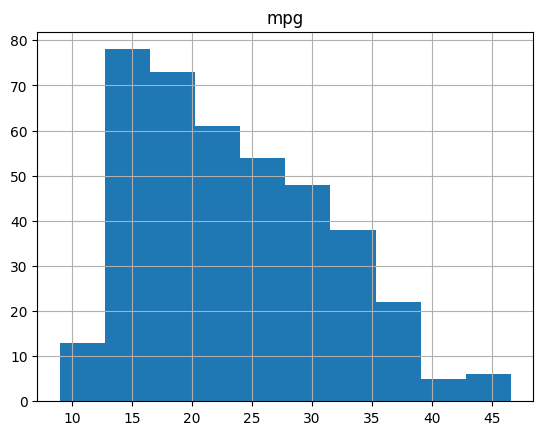

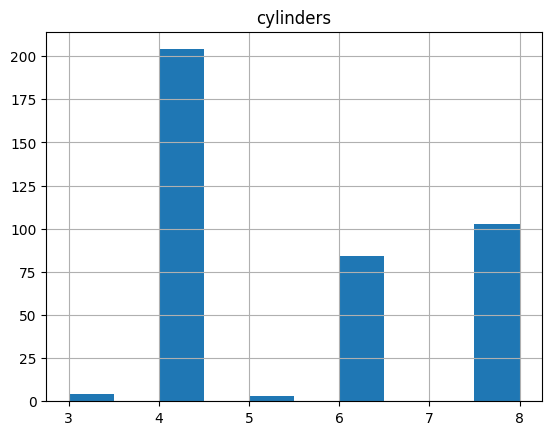

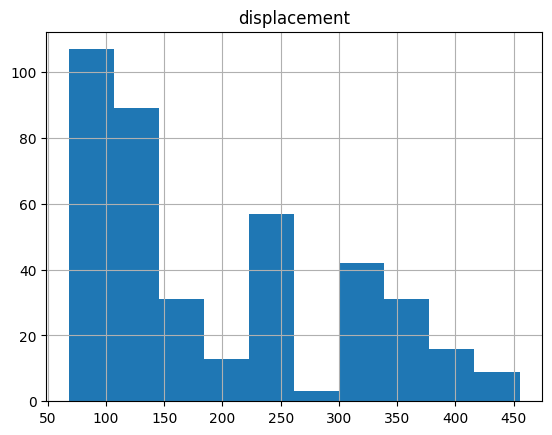

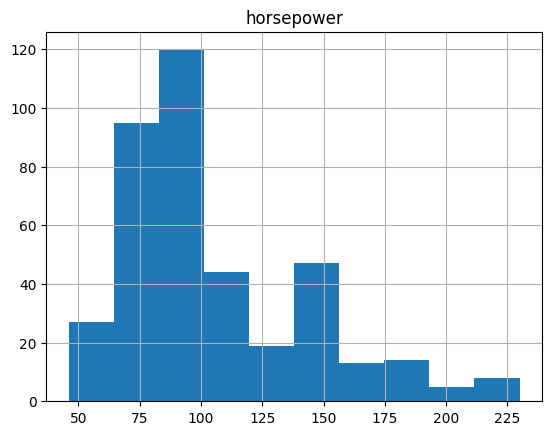

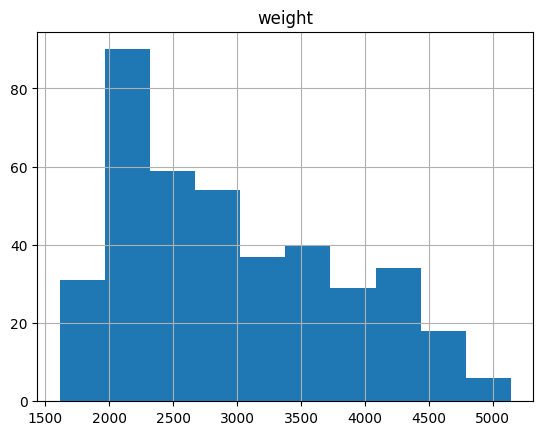

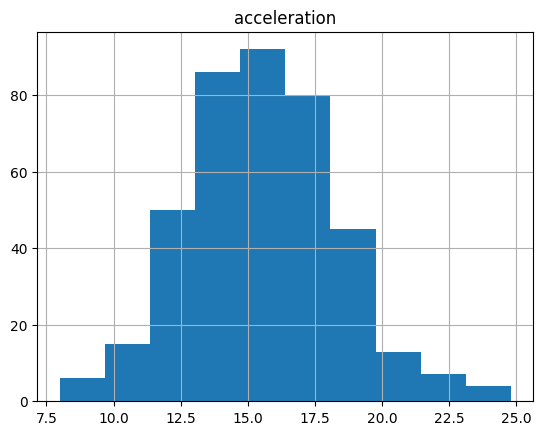

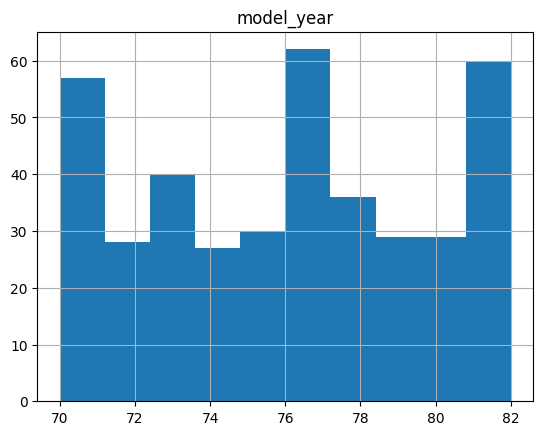

In [87]:
df.hist('mpg')
df.hist('cylinders')
df.hist('displacement')
df.hist('horsepower')
df.hist('weight')
df.hist('acceleration')
df.hist('model_year')
plt.show()

### Observations: 

Model year has a nice even spread with peaks in 70, 76, and 82 at about 60 vehicles, while most other years had only 30. 

MPG, horsepower, weight, and displacement were all skewed right.

acceleration had a normal bell shaped curve. 

## Initial Data Distribution for Categorical Columns

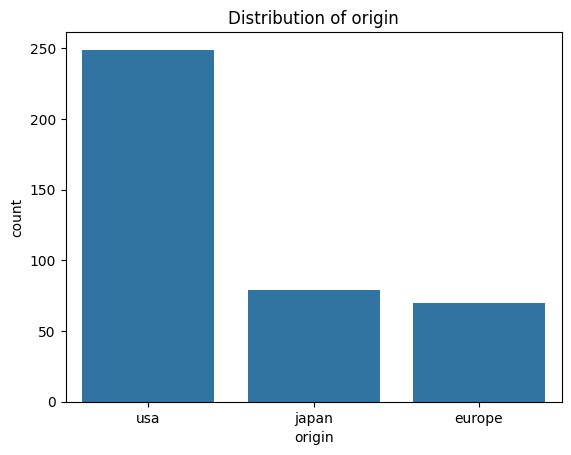

In [88]:

sns.countplot(x='origin', data=df)
plt.title(f'Distribution of origin')
plt.show()


### Observations: 

There are triple the number of vehicles from the USA compared to Japan and Europe.

## Data Transformation: 

Renaming origin to Region of Origin 
Creating a new column called 

In [89]:
df.rename(columns={'origin': 'Region of Origin'}, inplace=True)
df['horsepower_per_cylinder'] = df['horsepower']/df['cylinders']
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year Region of Origin                       name  \
0          70              usa  chevrolet chevelle malibu   
1          70              usa          buick skylark 320   
2          70              usa         plymouth satellite   
3          70              usa              amc rebel sst   
4          70              usa                ford torino   

   horsepower_per_cylinder  
0                   16.250  
1                   20.625  
2                   18.750  
3                   18.750  
4                   17.500  


## Initial Visualizations

### Pair Plot
Create a pair plot comparing all of the quantitative variables with a vehicle's fuel efficiency. I want to especially pay attention to which variables seem to have the strongest correlation to fuel efficiency. 

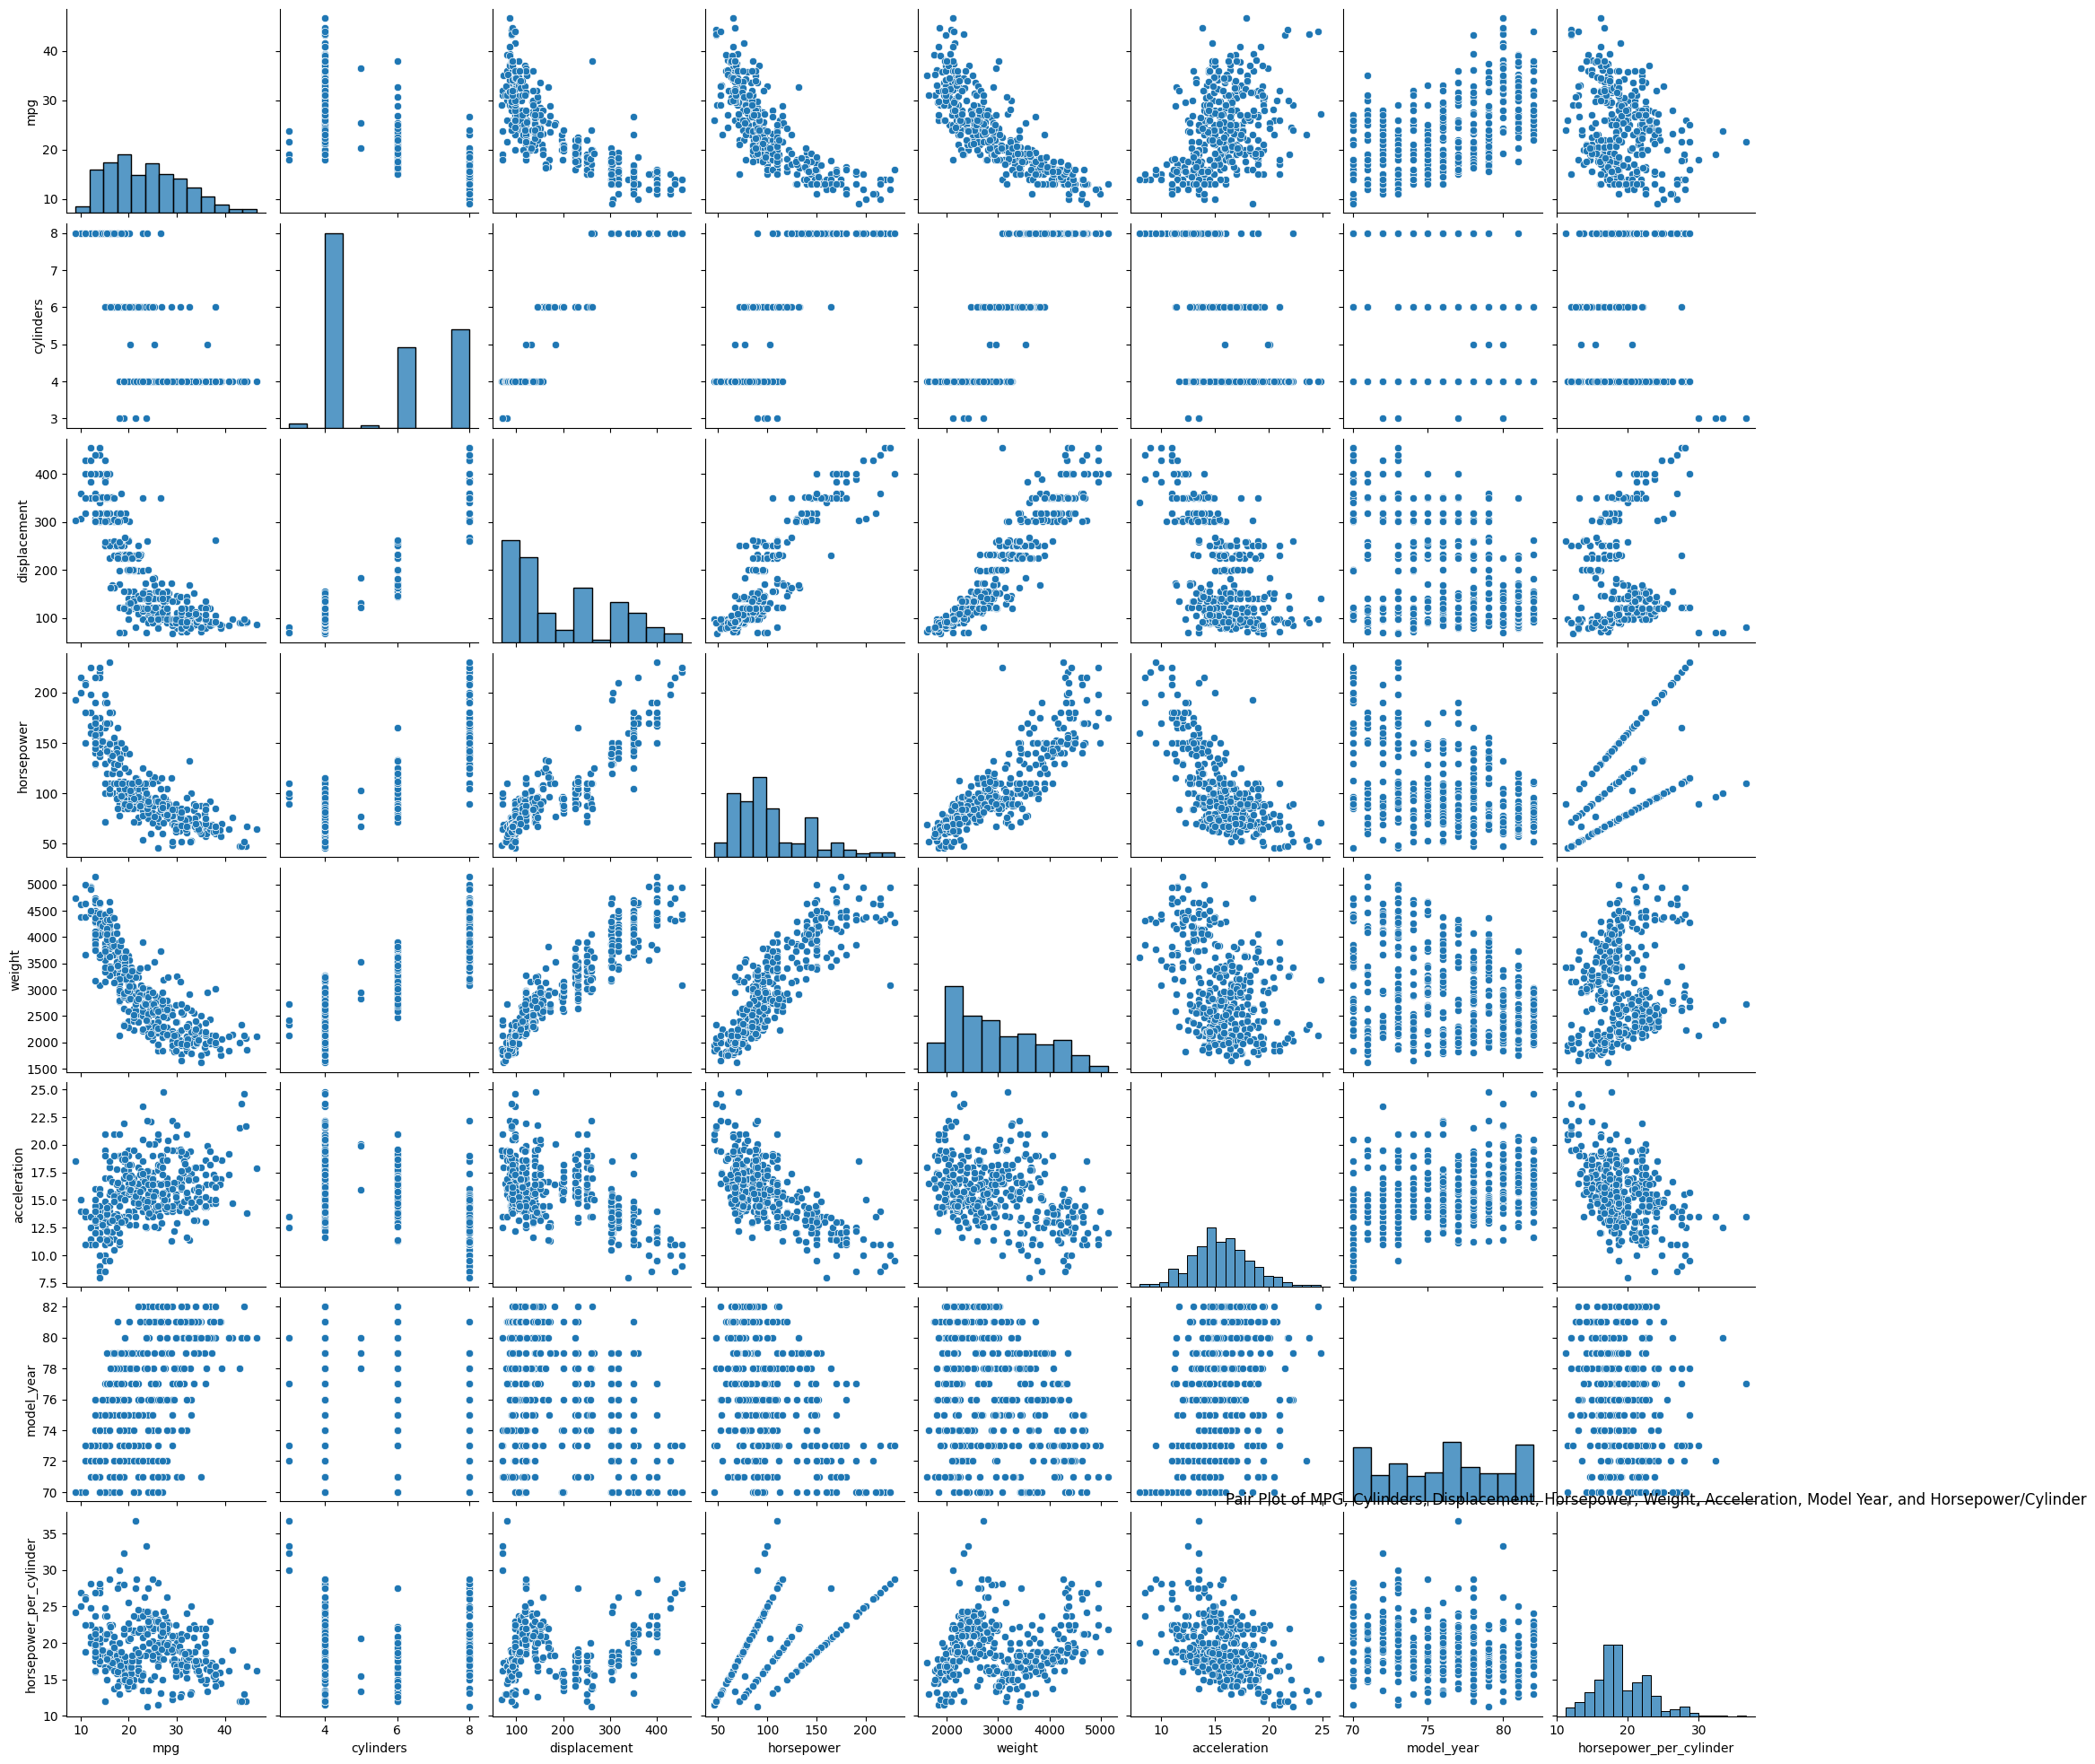

In [90]:

sns.pairplot(df)
plt.title("Pair Plot of MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, and Horsepower/Cylinder")
plt.show()



### Observations: 

From the pair plot, it is clear to see of the continuous variables, displacement, horsepower, and weight have a relatively strong negative correlation to mpg while accleration and horsepower as a ratio to cylinders have a pretty weak correlation to miles per gallon.  

## Initial Visualtization

### Scatter Plot

I will create two scatter plots comparing both horsepower and weight to miles per gallon. In each scatter plot I will also differentiate between the country of origin to see if there appears to be a pattern there as well. 

Text(0.5, 1.0, 'Miles per Gallon as a Function of Horsepower')

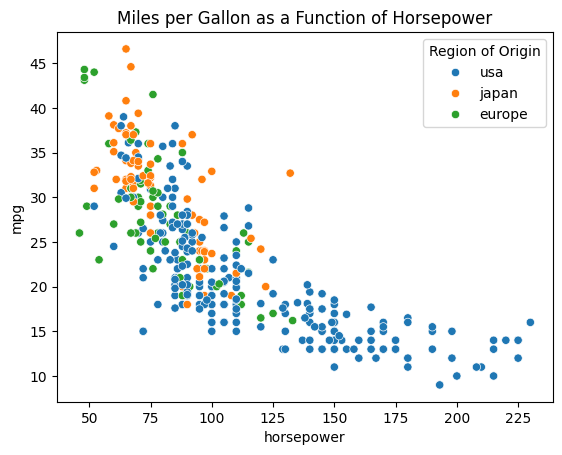

In [91]:
sns.scatterplot(data=df, x='horsepower', y='mpg', hue='Region of Origin')
plt.title("Miles per Gallon as a Function of Horsepower")


Text(0.5, 1.0, 'Miles per Gallon as a Function of weight')

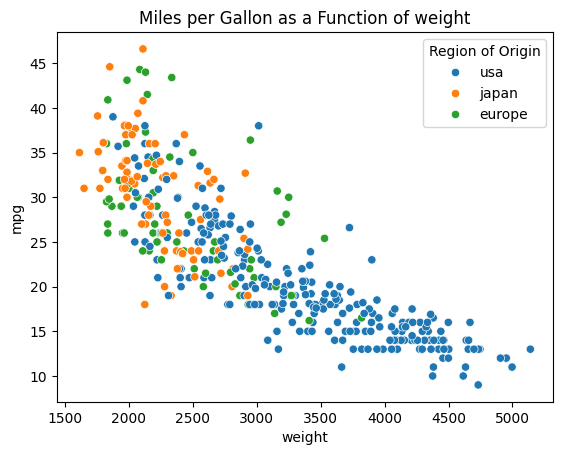

In [92]:
sns.scatterplot(data=df, x='weight', y='mpg', hue='Region of Origin')
plt.title("Miles per Gallon as a Function of weight")

### Observations

As expected from the pair plot in the previous section, it is clear that the more horsepower and weight a vehicle has, typcially the lower the fuel efficiency of the vehicle. It also appears that cars originating in Europe and Asia tend to have less horsepower and less weight, making their vehicles more fuel efficient. 

## Initial Visualization

### Line Plot

I created a line plot comparing the year of release to fuel efficiency also to determine if the later the vehicle is released the more fuel efficient the vehicle is. Like the previous section, I also broke the lines down by country of origin as well. 

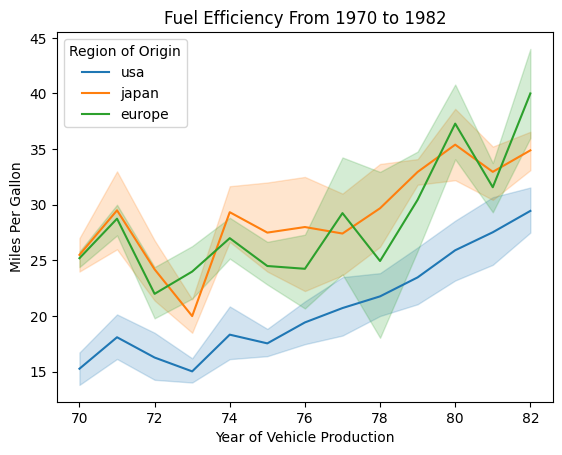

In [93]:
sns.lineplot(data=df, x='model_year', y= 'mpg', hue = 'Region of Origin')
plt.title("Fuel Efficiency From 1970 to 1982")
plt.xlabel("Year of Vehicle Production")
plt.ylabel("Miles Per Gallon")
plt.show()

### Observations:

I noticed that all three region's of origin improved their fuel efficiency as time went by. Asia and USA both had a less drastic changes from year to year but it appears Europe is winning the fuel efficency race, at least by 1982. It is interesting to see that all three regions typcially follow the same pattern of increases and decreases to fuel efficiency over the years. 

## Final Conclusions

It is not suprising that in order to be more fuel efficient, you should not have as heavy of a vehicle and you should have fewer cylinders with less horsepower. More vehicles produced in Europe and Asia will tend to less weight and horsepower, making them more fuel efficient. Newer vehicles also have a tendency to be more fuel efficient as well. 